<a href="https://colab.research.google.com/github/lei-yang5/ml-bigData-projects/blob/main/LeiYang_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conventional ML Model

The final conventional model that produced the best-performing predictions for Kaggle submission (accuracy 56%) was Random Forest with hyper-parameters of   “n_estimators=200,criterion=“gini”.  

Looking into our dataset and plotting of the Emotion Labels in Training Dataset, we knew we dealt with imbalanced dataset of 7 lables and more than 2500 data labled “happy” and olny less than 300 data labelled “disgusted”.

SVM was tried first. Since SVM is imbalance dataset sensitive, class_weight was set to “balanced” (assigning higher misclassification penalties to training instances of the minority class). The validation accuracy was 50% which took extremely long time to train.  

To reduce training time, PCA was applied for dimentionality reduction which reduced training time significantly. However the accuracy dropped to 45% unexpectedly. It seemed PCA eliminated useful features.

Random Forest was the next attempt as it isn’t imbalanced data sensitive and it is a great classification algorithm. Dataset was fitted in n_estimators=100 model and the accuracy improved to 54%.

To improve accuracy further, cross validation was used to find the better hyper parameters  which are “n_estimators=200,criterion="gini”. After retraining, the accuracy of validation slightly improved to 55%. However, the training accuracy already reached 99.87% indicating the model had been overfitted. 

Other conventional algorithms(SGD,Perceptron,AdaBoost, MLPClassifier) were also experimented. However they didn't perform well as Radom Forest and the accuracy were in the range of 28-48%.

Interestingly, the accuracy of Random Forest on public test data improved from 50.968% to 53.521% simply by splitting train-validation dataset from 25% validation data to 10% validation data. That again proved bigger data helps models to train better. 

The detail of code and brief notes of conventional modes are as follows.

In [ ]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

drive.mount('/content/drive/')

image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']
dataset_directory = '/content/drive/My Drive/handson-ml2/projectData'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'Training_data_images.npy'))
labels_train = np.load(join(dataset_directory, 'Training_data_labels.npy'))

images_test_public = np.load(join(dataset_directory, 'PublicTest_data_images.npy'))
images_test_private= np.load(join(dataset_directory, 'PrivateTest_data_images.npy'))

images_train = images_train.reshape([-1, image_size, image_size])
images_test_public = images_test_public.reshape([-1, image_size, image_size])

print(images_train.shape)
print(labels_train.shape)
print(images_test_public.shape)
print(images_test_private.shape)



Mounted at /content/drive/
(9328, 48, 48)
(9328,)
(1136, 48, 48)
(1153, 48, 48)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sample = 7
print(images_train[sample])
print(labels_train[sample])
print(EMOTIONS[labels_train[sample]])

[[0.42352941 0.42745098 0.41176471 ... 0.42352941 0.41960784 0.41960784]
 [0.42745098 0.42352941 0.42745098 ... 0.42745098 0.41568627 0.41568627]
 [0.43137255 0.41568627 0.43137255 ... 0.43137255 0.41568627 0.41568627]
 ...
 [0.36470588 0.35686275 0.34509804 ... 0.32941176 0.34117647 0.34509804]
 [0.36470588 0.35686275 0.35294118 ... 0.32941176 0.3372549  0.34509804]
 [0.36470588 0.36078431 0.35294118 ... 0.3254902  0.3254902  0.3372549 ]]
5
surprised


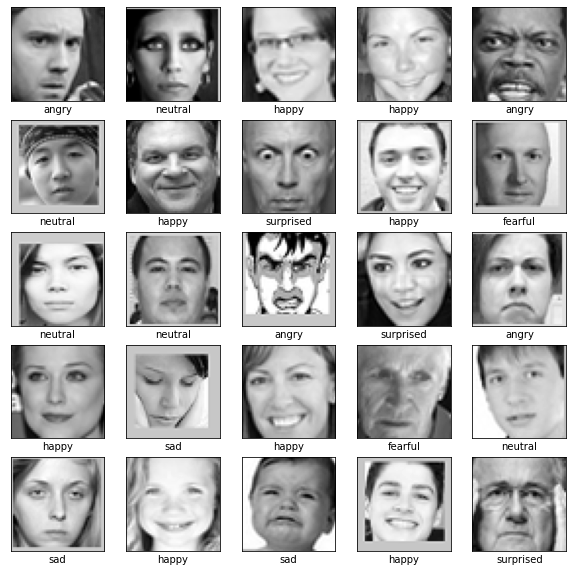

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap='gray')
    plt.xlabel( EMOTIONS[ labels_train[i] ] )
plt.show()

In [ ]:
labels_train[0:8]

array([0, 6, 3, 3, 0, 6, 3, 5])

Text(0.5, 1.0, 'Emotion Labels in Training Data')

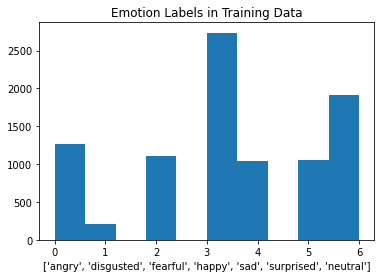

In [ ]:
#plot EMOTION labels
plt.hist(labels_train)
plt.xlabel(EMOTIONS)
plt.title("Emotion Labels in Training Data")

We can see most emotion labels from training data are happy and neutral and disgusted is the least. We are dealing unbalance dataset. We may consider banlance the date before applying models

In [ ]:
images_train.shape

(9328, 48, 48)

In [ ]:
#random.shuffle(images_train)

In [ ]:
#convert training data from 3d to 2d data
nsamples, nx, ny = images_train.shape
d2_images_train = images_train.reshape((nsamples,nx*ny))
nsamples1,nx1,ny1=images_test_public.shape
X_test=images_test_public.reshape(nsamples1,nx1*ny1)

X_train,X_validation,y_train,y_validation=train_test_split(d2_images_train,labels_train,test_size=0.1)

Data augementation for the minority class

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE("minority")
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_train.shape)
print(X_train_sm.shape)

(8395, 2304)
(10650, 2304)


Text(0.5, 1.0, 'SMOTE Emotion Labels in Training Data')

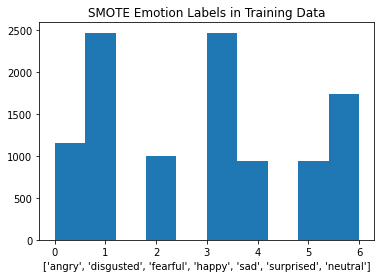

In [ ]:
plt.hist(y_train_sm)
plt.xlabel(EMOTIONS)
plt.title("SMOTE Emotion Labels in Training Data")

The minority class-"disgusted" increased by 2255

### SVM with class_weight="balanced"

In [ ]:
#train the data using SVM with balanced data
from sklearn.svm import SVC
model_svc=SVC(class_weight="balanced").fit(X_train,y_train)

In [ ]:
predicts=model_svc.predict(X_validation)

In [ ]:
from sklearn.metrics import classification_report
print("\n SVM Classification Report\n",classification_report( y_validation,predicts,target_names=EMOTIONS))


 SVM Classification Report
               precision    recall  f1-score   support

       angry       0.35      0.40      0.38       120
   disgusted       0.53      0.56      0.54        18
     fearful       0.41      0.36      0.38       119
       happy       0.74      0.66      0.70       260
         sad       0.24      0.29      0.26        92
   surprised       0.57      0.62      0.60       119
     neutral       0.47      0.46      0.47       205

    accuracy                           0.50       933
   macro avg       0.47      0.48      0.48       933
weighted avg       0.52      0.50      0.51       933



Low accuracy score and super slow train rate. Consider reducing data dimension to reduce training time and improve accuracy

### Use PCA Reducing Data Dimensionality

In [ ]:

print("Dimensions of the images:", X_train.shape[1])
reduced_dimensions=int(np.round(np.sqrt(X_train.shape[1])))
print("Reduced dimensions:", reduced_dimensions)

Dimensions of the images: 2304
Reduced dimensions: 48


The dimensiions were reduced to 48 from 2304

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=reduced_dimensions).fit(d2_images_train)
X_train_pca=pca.transform(X_train)
X_validation_pca=pca.transform(X_validation)

In [ ]:
print(X_train_pca.shape)
print(X_validation_pca.shape)

(8395, 48)
(933, 48)


In [ ]:
model_svc_pca=SVC(class_weight="balanced").fit(X_train_pca,y_train)

In [ ]:
predicts_pca=model_svc_pca.predict(X_validation_pca)
print("\n Classification Report for SVC after pca \n", classification_report(y_validation,predicts_pca,target_names=EMOTIONS))


 Classification Report for SVC after pca 
               precision    recall  f1-score   support

       angry       0.26      0.31      0.28       120
   disgusted       0.23      0.61      0.33        18
     fearful       0.31      0.27      0.29       119
       happy       0.71      0.59      0.64       260
         sad       0.22      0.26      0.24        92
   surprised       0.60      0.59      0.59       119
     neutral       0.46      0.44      0.45       205

    accuracy                           0.45       933
   macro avg       0.40      0.44      0.40       933
weighted avg       0.47      0.45      0.46       933



#### Tuning the parameters("C" and "gamma") in SVC 

In [ ]:

param_grid={"C":[0.1,0.5,1,2,3],
            #"kernel":('linear', 'poly', 'rbf', 'sigmoid'),
            "gamma":[0.003,0.004,0.005,0.006,0.007]}
clf=GridSearchCV(SVC(),param_grid=param_grid).fit(X_train_pca,y_train)


In [ ]:
print(clf.best_estimator_)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.007, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
svc_new=SVC(C=3,gamma=0.007,class_weight="balanced").fit(X_train_pca,y_train)

In [ ]:
print("\n Classification Report after Tuning \n",classification_report(y_validation,clf.predict(X_validation_pca)))


 Classification Report after Tuning 
               precision    recall  f1-score   support

           0       0.34      0.32      0.33       120
           1       1.00      0.17      0.29        18
           2       0.43      0.19      0.27       119
           3       0.57      0.76      0.65       260
           4       0.27      0.13      0.18        92
           5       0.61      0.51      0.56       119
           6       0.41      0.55      0.47       205

    accuracy                           0.48       933
   macro avg       0.52      0.37      0.39       933
weighted avg       0.47      0.48      0.45       933



Accuracy was improved to 50%. Still not satisfing 

### Random Forest

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 rfc=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [ ]:
print("\n Random Forest Classification_report\n", classification_report(y_validation,rfc.predict(X_validation),target_names=EMOTIONS))


 Random Forest Classification_report
               precision    recall  f1-score   support

       angry       0.45      0.28      0.35       120
   disgusted       1.00      0.44      0.62        18
     fearful       0.58      0.25      0.35       119
       happy       0.54      0.87      0.66       260
         sad       0.38      0.13      0.19        92
   surprised       0.71      0.59      0.64       119
     neutral       0.45      0.55      0.50       205

    accuracy                           0.53       933
   macro avg       0.59      0.44      0.47       933
weighted avg       0.53      0.53      0.50       933



In [ ]:
print("\n Random Forest Classification_report\n", classification_report(y_validation,rfc.predict(X_validation),target_names=EMOTIONS))


 Random Forest Classification_report
               precision    recall  f1-score   support

       angry       0.41      0.30      0.34       118
   disgusted       1.00      0.29      0.44        28
     fearful       0.62      0.26      0.37       115
       happy       0.57      0.86      0.69       272
         sad       0.52      0.12      0.20       106
   surprised       0.67      0.67      0.67       111
     neutral       0.40      0.54      0.46       183

    accuracy                           0.53       933
   macro avg       0.60      0.43      0.45       933
weighted avg       0.54      0.53      0.49       933



RandomForest achived the 53% accuracy

#### Tuning the parameters("n_estimators" and "criterion") of RandomForest 

In [ ]:
param_grid_rfc={"n_estimators":[100,200],
            #"kernel":('linear', 'poly', 'rbf', 'sigmoid'),
            "criterion":("gini","entropy")}

clf_rfc=GridSearchCV(RandomForestClassifier(),param_grid=param_grid_rfc).fit(X_train,y_train)
print(clf_rfc.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
rfc_1=RandomForestClassifier(n_estimators=200,criterion="gini").fit(X_train,y_train)

In [ ]:
print(classification_report(y_validation,clf_rfc.predict(X_validation)))

              precision    recall  f1-score   support

           0       0.59      0.34      0.43       132
           1       1.00      0.40      0.57        25
           2       0.56      0.21      0.30       111
           3       0.55      0.85      0.67       268
           4       0.46      0.11      0.17       103
           5       0.76      0.64      0.70       100
           6       0.46      0.66      0.54       194

    accuracy                           0.55       933
   macro avg       0.63      0.46      0.48       933
weighted avg       0.56      0.55      0.51       933



In [ ]:
print(rfc.score(X_train,y_train))


0.9986896962477665


The accuracy was back to 55% but comparing with the training rate of 99.89%. The model after tuning is apparently overfitting.

### First Submission using Random Forest Predictions

In [ ]:
import pandas as pd
predictions=pd.DataFrame(rfc.predict(X_test))
#make the index a colunm (level means how many index left, the others will be 
#moved to the columns)
predictions_s=predictions.reset_index(level=0)
predictions_s.columns=["ID","Predictions"]
print(predictions_s)

        ID  Predictions
0        0            3
1        1            3
2        2            3
3        3            5
4        4            6
...    ...          ...
1131  1131            5
1132  1132            2
1133  1133            6
1134  1134            3
1135  1135            6

[1136 rows x 2 columns]


In [ ]:
submission = predictions_s
print(submission.head())
submission.to_csv('46039791-conv1.csv', index=False)


   ID  Predictions
0   0            3
1   1            3
2   2            3
3   3            5
4   4            6


### SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#sgd=make_pipeline(StandardScaler().fit(X_train),SGDClassifier()).fit(X_train)
#sgd=SGDClassifier().fit(X_train,y_train)
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train1 = scaler.transform(X_train)
X_validation1=scaler.transform(X_validation)
sgd=SGDClassifier().fit(X_train1,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,sgd.predict(X_validation1)))

              precision    recall  f1-score   support

           0       0.25      0.28      0.26       120
           1       0.14      0.06      0.08        18
           2       0.22      0.18      0.20       119
           3       0.57      0.63      0.60       260
           4       0.15      0.20      0.17        92
           5       0.60      0.46      0.52       119
           6       0.38      0.37      0.37       205

    accuracy                           0.39       933
   macro avg       0.33      0.31      0.31       933
weighted avg       0.40      0.39      0.39       933



In [ ]:
sgd.score(X_train1,y_train)

0.651340083382966

### Perceptron

In [ ]:
sgd_percp=SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).fit(X_train,y_train)

In [ ]:
print(classification_report(y_validation,sgd_percp.predict(X_validation)))

              precision    recall  f1-score   support

           0       0.32      0.21      0.25       120
           1       0.08      0.56      0.14        18
           2       0.27      0.36      0.31       119
           3       0.74      0.55      0.63       260
           4       0.16      0.07      0.09        92
           5       0.66      0.21      0.32       119
           6       0.41      0.60      0.48       205

    accuracy                           0.40       933
   macro avg       0.38      0.36      0.32       933
weighted avg       0.47      0.40      0.41       933



### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(RandomForestClassifier(n_estimators=100),n_estimators=10).fit(X_train,y_train)

In [ ]:
print(classification_report(y_validation,ada.predict(X_validation)))
ada.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.58      0.28      0.38       120
           1       1.00      0.39      0.56        18
           2       0.78      0.21      0.33       119
           3       0.43      0.92      0.58       260
           4       0.57      0.09      0.15        92
           5       0.85      0.48      0.61       119
           6       0.42      0.40      0.41       205

    accuracy                           0.48       933
   macro avg       0.66      0.39      0.43       933
weighted avg       0.57      0.48      0.45       933



0.9986896962477665

### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,solver='sgd', verbose=10, random_state=1,learning_rate_init=.1).fit(X_train,y_train)


Iteration 1, loss = 2.23515812
Iteration 2, loss = 1.79032327
Iteration 3, loss = 1.78672007
Iteration 4, loss = 1.78695817
Iteration 5, loss = 1.78649692
Iteration 6, loss = 1.78645026
Iteration 7, loss = 1.78673898
Iteration 8, loss = 1.78655805
Iteration 9, loss = 1.78664635
Iteration 10, loss = 1.78682523


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(classification_report(y_validation,mlp.predict(X_validation)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00       119
           3       0.28      1.00      0.44       260
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00       119
           6       0.00      0.00      0.00       205

    accuracy                           0.28       933
   macro avg       0.04      0.14      0.06       933
weighted avg       0.08      0.28      0.12       933



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting of conventional models vs accuracy

([<matplotlib.axis.YTick at 0x7fef0de43128>,
 [Text(0, 0, 'SVM'),
  Text(0, 0, 'RF'),
  Text(0, 0, 'SGD'),
  Text(0, 0, 'Perceptron'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'MLPClassifier')])

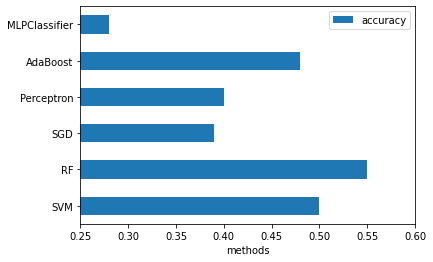

In [ ]:
import pandas as pd
methods=["SVM","RF","SGD","Perceptron","AdaBoost","MLPClassifier"]
accuracy=[0.5,0.55,0.39,0.40,0.48,0.28]
y_pos = np.arange(len(methods))

MA=pd.DataFrame(list(zip(methods,accuracy)),columns=["methods","accuracy"])
MA.plot.barh()
plt.xlabel("methods")
plt.xlim(0.25,0.60)
plt.yticks(y_pos, methods)




# Deep Learning Model
The final model that produced the best-performing predictions for the Kaggle submission(public-test accuracy 61.09%,private-test accuracy 62.185%) is CNN with 4 convolutional layers and 2 dense layers. 


After preprocessing the dataset and weighting the labels, a 3-layer fully connected neural network was built. The model ended up with a very low and underfitting accuracy(2-3%) which was expected.

A very simple CNN with one convolutional layer and two dense layers was built for testing the reaction of dataset(learning rate=0.001). The input was the weighted dataset. The accuracy was increased to 53%-54%. But the model was quickly overfitted from less than 10 epochs. 

To avoid overfitting, normalisation, dropouts and data augmentation was applied to CNN. Training and validation accuracy started to get close but very low(13.5%) which indicated that the dataset needed more complex models.

After adding 4 more convolutional layers and increased batch_sizes, the validation performance improved to 60-63.24% along with training accuracy 82%(this is the best performing model). 

Original dataset(imbalanced) was also compared with weighted-class dataset on the best performing model. The confusion was the imbalanced dataset had better perfomance which is 63.24% than balanced dataset(61.63%). After consultation with the lecturer, it might be misleading of accuracy metric with imbalanced dataset. The right metric would be F1-score or even better area under the receiver operating characteristic curve (ROC AUC) which is a plot of the false positive rate to the true positive rate for all possible prediction thresholds.  

Other complex architectures(e.g.more layers) were also experimented and VGG16 was built from scratch. Unfortunatly, the models were overfitted very quickly and the validation accuracy remained in 58-59%.


### Buildup CNN

In [ ]:
import keras
import tensorflow as tf

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

### Preprocessing the dataset to fit in the CNN


In [ ]:

XN_train=X_train.reshape(8395,48,48,1)
XN_validation=X_validation.reshape(933,48,48,1)
XN_test=X_test.reshape(1136,48,48,1)
X_test_private=images_test_private.reshape(1153,48,48,1)
yn_train=keras.utils.to_categorical(y_train,7)
yn_validation=keras.utils.to_categorical(y_validation,7)

num_classes=len(EMOTIONS)

print(XN_test.shape)
print(X_test_private.shape)
print(XN_train.shape)
print(XN_validation.shape)
print(yn_train.shape)
print(yn_validation.shape)
print(XN_train[0])
print(yn_train)



(1136, 48, 48, 1)
(1153, 48, 48, 1)
(8395, 48, 48, 1)
(933, 48, 48, 1)
(8395, 7)
(933, 7)
[[[0.        ]
  [0.        ]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.00392157]
  [0.        ]
  ...
  [0.00784314]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.00784314]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.01176471]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.05490196]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


##### Balancing dataset by weighting class weights

In [ ]:
from sklearn.utils import class_weight
weight=class_weight.compute_class_weight("balanced",np.unique(labels_train),labels_train)
weight = {i : weight[i] for i in range(7)}

In [ ]:
print(weight)

{0: 1.0525840668020763, 1: 6.315504400812458, 2: 1.203768228158472, 3: 0.48705096073517123, 4: 1.2776332009313793, 5: 1.2667028788701793, 6: 0.6965872601000672}


The less number of class-"disgusted" got the highest weight 6.3155

### Try a fully connected network first

In [ ]:
model00=Sequential()

model00.add(Flatten(input_shape=[48,48,1]))
model00.add(Dense(512))
#model00.add(BatchNormalization())
model00.add(Activation('relu'))

model00.add(Dense(512))
#model00.add(BatchNormalization())
model00.add(Activation('relu'))


model00.add(Dense(7))

model00.summary()
opt00=Adam(learning_rate=0.001)
model00.compile(loss='categorical_crossentropy',
              optimizer=opt00,
              metrics=['accuracy'])

history00 = model00.fit(XN_train, yn_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(XN_validation, yn_validation),
                    class_weight=weight)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1180160   
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 3591      
Total params: 1,446,407
Trainable params: 1,446,407
Non-trainable params: 0
____________________________________________

The better validation accuracy(3%) than training accuracy(2.18%) indicating an underfitting model. We need a more complex one. 

### Starting from a very simple CNN with one convolutional layer and two dense layer


In [ ]:
# build the network
model0 = Sequential()

model0.add(Conv2D(64, (3, 3), input_shape=XN_train.shape[1:],data_format="channels_last"))
model0.add(Activation('relu'))


#fully connected layer
model0.add(Flatten())
model0.add(Dense(1024))
model0.add(Activation('relu'))

model0.add(Dense(num_classes))
model0.add(Activation('softmax'))

model0.summary()
opt=Adam(learning_rate=0.001)
model0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=5, min_lr=0.0001)
history0 = model0.fit(XN_train, yn_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(XN_validation, yn_validation),
                    class_weight=weight)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
activation_16 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              138675200 
_________________________________________________________________
activation_17 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 7175      
_________________________________________________________________
activation_18 (Activation)   (None, 7)                

The training accuracy is growing and can reached to 98.5%. However validation accuracy remained 55-56% and haven't imporved--the modle is overfitting....  

##### Avioding overfitting by adding normalization, max pooling, dropouts and data augmentation

In [ ]:
# build the network
model0_plus = Sequential()
# four alternating convolutional and max-pooling layers
model0_plus.add(Conv2D(64, (3, 3), input_shape=XN_train.shape[1:],data_format="channels_last"))
model0_plus.add(Activation('relu'))
model0_plus.add(MaxPooling2D(pool_size=(2, 2)))
model0_plus.add(BatchNormalization())
model0_plus.add(Dropout(0.5))

#fully connected layer
model0_plus.add(Flatten())
model0_plus.add(Dense(1024))
model0_plus.add(Activation('relu'))
model0_plus.add(BatchNormalization())
model0_plus.add(Dropout(0.5))


# final output classifier
model0_plus.add(Dense(num_classes))
model0_plus.add(Activation('softmax'))
model0_plus.add(BatchNormalization())
model0_plus.add(Dropout(0.5))

model0_plus.summary()
opt=Adam(learning_rate=0.001)
model0_plus.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=5)
history0_plus = model0_plus.fit(XN_train, yn_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(XN_validation, yn_validation),
                    class_weight=weight)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
activation_21 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 33856)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)            

##### Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    brightness_range=[1,1.5],# randomly brighten images,[1,2] is brightening 
                            #[0,1] is darkening 
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False) 
gen.fit(XN_train)

In [ ]:

history2 = model0_plus.fit_generator(gen.flow(XN_train, yn_train,
                                 batch_size=128),
                    steps_per_epoch=XN_train.shape[0]//128,
                    epochs=10,
                    validation_data=(XN_validation, yn_validation))
                    #callbacks=[reduce_lr])

Epoch 1/10
65/65 [==============================] - 5s 76ms/step - loss: 1.1921e-07 - accuracy: 0.1368 - val_loss: 1.1921e-07 - val_accuracy: 0.1350
Epoch 2/10
65/65 [==============================] - 5s 75ms/step - loss: 1.1921e-07 - accuracy: 0.1356 - val_loss: 1.1921e-07 - val_accuracy: 0.1350
Epoch 3/10
65/65 [==============================] - 5s 76ms/step - loss: 1.1921e-07 - accuracy: 0.1355 - val_loss: 1.1921e-07 - val_accuracy: 0.1350
Epoch 4/10
65/65 [==============================] - 5s 74ms/step - loss: 1.1921e-07 - accuracy: 0.1358 - val_loss: 1.1921e-07 - val_accuracy: 0.1350
Epoch 5/10
65/65 [==============================] - 5s 75ms/step - loss: 1.1921e-07 - accuracy: 0.1363 - val_loss: 1.1921e-07 - val_accuracy: 0.1350
Epoch 6/10
65/65 [==============================] - 5s 76ms/step - loss: 1.1921e-07 - accuracy: 0.1355 - val_loss: 1.1921e-07 - val_accuracy: 0.1350
Epoch 7/10
65/65 [==============================] - 5s 76ms/step - loss: 1.1921e-07 - accuracy: 0.1357 - v

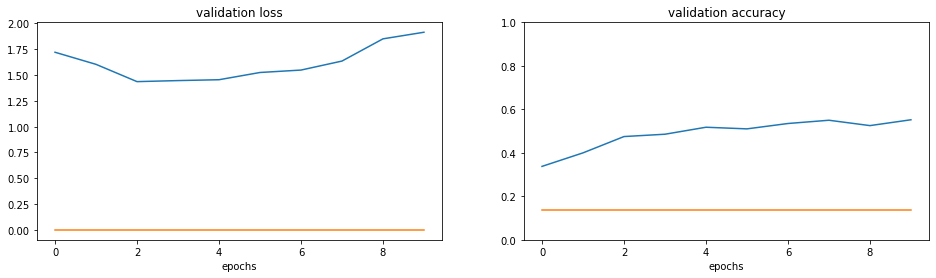

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history0.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history0.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Training and validation accuracy are similar but very low 13.5%. We need more complex models.

### Add more convolutional layers with maxpooling and dropouts _model1(4 conv layers)

In [ ]:
# build the network
model1 = Sequential()
# four alternating convolutional and max-pooling layers
model1.add(Conv2D(64, (3, 3), input_shape=XN_train.shape[1:],data_format="channels_last"))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))
# final output classifier
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

opt1=Adam(learning_rate=0.001)
model1.summary()
model1.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

history1 = model1.fit(XN_train, yn_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(XN_validation, yn_validation))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
activation_36 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 21, 21, 32)        18464     
_________________________________________________________________
activation_37 (Activation)   (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 10, 10, 32)      

The validation performance improved to 57-58% with training accuracy 57%.The model is still underfitting. Try to bulid more complex one see if we can prove the whole accuracy.

#### Model1_m:Let's try adding more layers on model1

In [ ]:
# build the network
model1_m = Sequential()
# four alternating convolutional and max-pooling layers
model1_m.add(Conv2D(128, (3, 3), input_shape=XN_train.shape[1:],data_format="channels_last"))
model1_m.add(Activation('relu'))
model1_m.add(MaxPooling2D(pool_size=(2, 2)))

model1_m.add(Conv2D(64, (3, 3)))
model1_m.add(Activation('relu'))
model1_m.add(MaxPooling2D(pool_size=(2, 2)))

model1_m.add(Dropout(0.25))

model1_m.add(Conv2D(64, (3, 3)))
model1_m.add(Activation('relu'))
model1_m.add(MaxPooling2D(pool_size=(2, 2)))

model1_m.add(Conv2D(64, (3, 3)))
model1_m.add(Activation('relu'))
model1_m.add(MaxPooling2D(pool_size=(2, 2)))

model1_m.add(Dropout(0.25))


#fully connected layer
model1_m.add(Flatten())
model1_m.add(Dense(256))
model1_m.add(Activation('relu'))

model1_m.add(Dropout(0.5))
# final output classifier
model1_m.add(Dense(num_classes))
model1_m.add(Activation('softmax'))

opt1=Adam(learning_rate=0.001)
model1_m.summary()
model1_m.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

history1_m = model1_m.fit(XN_train, yn_train,
                    batch_size=64,
                    epochs=100,
                    validation_data=(XN_validation, yn_validation))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 128)       1280      
_________________________________________________________________
activation_6 (Activation)    (None, 46, 46, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
activation_7 (Activation)    (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 64)       

Validation accuracy raised to 63% and training accuracay reached 74%. The model is slightly overfitted.

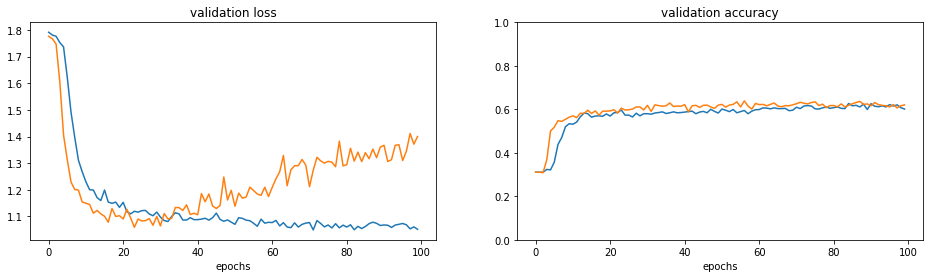

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history1.history["val_loss"])
ax.plot(history1_m.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history1.history["val_accuracy"])
ax2.plot(history1_m.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

#### Training balanced data in the model -model1_m_w

In [ ]:
# build the network
model1_m_w = Sequential()
# four alternating convolutional and max-pooling layers
model1_m_w.add(Conv2D(128, (3, 3), input_shape=XN_train.shape[1:],data_format="channels_last"))
model1_m_w.add(Activation('relu'))
model1_m_w.add(MaxPooling2D(pool_size=(2, 2)))

model1_m_w.add(Conv2D(64, (3, 3)))
model1_m_w.add(Activation('relu'))
model1_m_w.add(MaxPooling2D(pool_size=(2, 2)))

model1_m_w.add(Dropout(0.25))

model1_m_w.add(Conv2D(64, (3, 3)))
model1_m_w.add(Activation('relu'))
model1_m_w.add(MaxPooling2D(pool_size=(2, 2)))

model1_m_w.add(Conv2D(64, (3, 3)))
model1_m_w.add(Activation('relu'))
model1_m_w.add(MaxPooling2D(pool_size=(2, 2)))

model1_m_w.add(Dropout(0.25))


#fully connected layer
model1_m_w.add(Flatten())
model1_m_w.add(Dense(256))
model1_m_w.add(Activation('relu'))

model1_m_w.add(Dropout(0.5))
# final output classifier
model1_m_w.add(Dense(num_classes))
model1_m_w.add(Activation('softmax'))

opt1=Adam(learning_rate=0.001)
model1_m_w.summary()
model1_m_w.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

history1_m_w = model1_m.fit(XN_train, yn_train,
                    batch_size=64,
                    epochs=100,
                    validation_data=(XN_validation, yn_validation),
                    class_weight=weight)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 128)       1280      
_________________________________________________________________
activation_12 (Activation)   (None, 46, 46, 128)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
activation_13 (Activation)   (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 64)       

#### Plotting of imbalanced vs banlanced data in model1_m

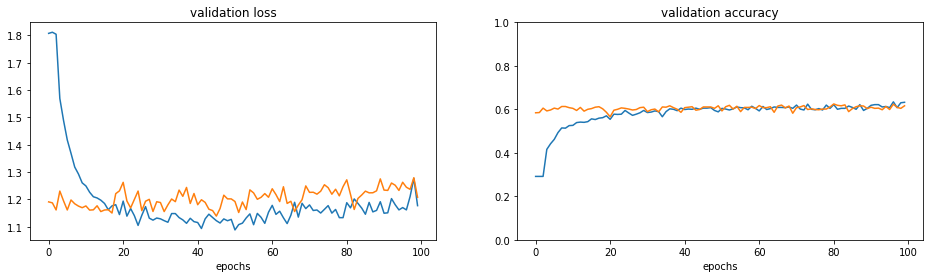

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history1_m.history["val_loss"])
ax.plot(history1_m_w.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history1_m.history["val_accuracy"])
ax2.plot(history1_m_w.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Balanced dataset and imbalanced dataset have had very similar accuracy.



### Let's try some more complexed architechtures

#### Add more layers 

In [ ]:
model_mm = Sequential()
model_mm.add(Conv2D(input_shape=(48,48,1),filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model_mm.add(Dropout(0.5))
model_mm.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_mm.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_mm.add(Dropout(0.5))
model_mm.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_mm.add(Dropout(0.5))
model_mm.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_mm.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_mm.add(Dropout(0.5))
model_mm.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_mm.add(Dropout(0.5))
model_mm.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_mm.add(Dropout(0.5))
#model_mm.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_mm.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_mm.add(Flatten())
model_mm.add(Dense(units=256,activation="relu"))
#model_mm.add(Dense(units=256,activation="relu"))
model_mm.add(Dense(units=7, activation="softmax"))
model_mm.summary()

opt1=Adam(learning_rate=0.0001)
model_mm.summary()
model_mm.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

history_mm = model_mm.fit(XN_train, yn_train,
                    batch_size=64,
                    epochs=100,
                    validation_data=(XN_validation, yn_validation))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 48, 48, 128)       1280      
_________________________________________________________________
dropout_18 (Dropout)         (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 48, 48, 64)        73792     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 24, 128)      

Validation accuracy remained in 58% while training accuracy reached to 91%. Overfitted model.

#### Transfer learning use VGG16
(I just build a VGG from scratch as I had trouble to feed grayscale data to RGB formatted pretrain models)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(48,48,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=7, activation="softmax"))
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 256)      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#checkpoint = ModelCheckpoint(monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                             # patience=5, min_lr=0.0001)
history3 = model.fit(XN_train, yn_train,
                    batch_size=100,
                    epochs=100,
                    validation_data=(XN_validation, yn_validation))
                     #callbacks=[reduce_lr])

Epoch 1/100
84/84 [==============================] - 9s 102ms/step - loss: 1.8172 - accuracy: 0.2783 - val_loss: 1.7829 - val_accuracy: 0.3108
Epoch 2/100
84/84 [==============================] - 8s 89ms/step - loss: 1.7912 - accuracy: 0.2914 - val_loss: 1.7831 - val_accuracy: 0.3108
Epoch 3/100
84/84 [==============================] - 8s 90ms/step - loss: 1.7636 - accuracy: 0.2943 - val_loss: 1.6235 - val_accuracy: 0.3623
Epoch 4/100
84/84 [==============================] - 8s 90ms/step - loss: 1.5466 - accuracy: 0.4091 - val_loss: 1.5000 - val_accuracy: 0.4126
Epoch 5/100
84/84 [==============================] - 8s 91ms/step - loss: 1.4362 - accuracy: 0.4584 - val_loss: 1.4225 - val_accuracy: 0.4737
Epoch 6/100
84/84 [==============================] - 8s 91ms/step - loss: 1.3552 - accuracy: 0.4903 - val_loss: 1.3484 - val_accuracy: 0.4962
Epoch 7/100
84/84 [==============================] - 8s 92ms/step - loss: 1.2817 - accuracy: 0.5097 - val_loss: 1.2487 - val_accuracy: 0.5059
Epoch

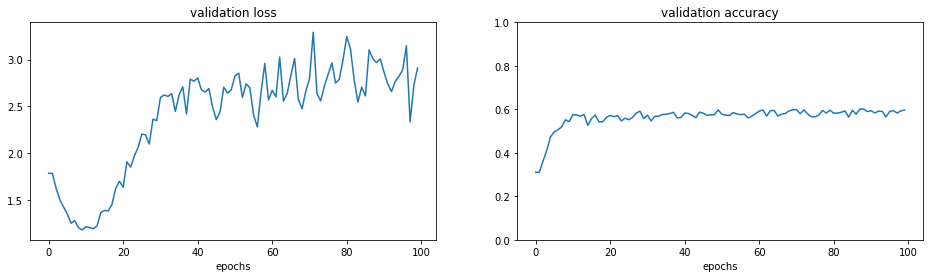

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history3.history["val_loss"])
#ax.plot(history10.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history3.history["val_accuracy"])
#ax2.plot(history10.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Validation accuracy is 59% but training accuracy reached 99%. Way too overfitted.

(Reference:

Rohit Thakur(2019 Aug 06) towards data science *Step by step VGG16 implementation in Keras for beginners*  
Retrieved from: https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
)

### Second submission 

In [ ]:
import pandas as pd
#predictions=pd.DataFrame(rfc.predict(X_test))
pred_d=pd.DataFrame(model1_m.predict_classes(XN_test))

predictions_d=pred_d.reset_index(level=0)
predictions_d.columns=["ID","Predictions"]

      


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
submission_d = predictions_d
print(submission_d.head())
submission_d.to_csv('46039791-deep5_model1_m.csv', index=False)

   ID  Predictions
0   0            3
1   1            3
2   2            2
3   3            0
4   4            6


### Private test submission

In [ ]:
import pandas as pd

pred_p=pd.DataFrame(model1.predict_classes(X_test_private))

predictions_p=pred_p.reset_index(level=0)
predictions_p.columns=["ID","Predictions"]

submission_p = predictions_p
print(submission_p.head())
submission_p.to_csv('46039791_private2.csv', index=False)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
   ID  Predictions
0   0            6
1   1            3
2   2            3
3   3            6
4   4            3


# Discussion of Model Performance and Implementation

Comparing final conventional ML and deep learning models, the deep learning one outperformed by 7.57% on the public test set. The deep learning model ranked #33 out of 69 submissions on the public test set, with the 61.09% accuracy.

For public test accuracy, the private test accuary outperformed by 1.1%. Considering the overall improvement of performance in the private test, it is observed that the private dataset might randomly more similar with training set would been used.

For validation accuracy, Over 63% of public test accuracy was expected. Whereas, the actual accuracy was 2% less. Assuming one of the reasons might be the best model already started overfitting (training accuracy 81%) during the training phase.

One of the concern is how imbalanced dataset would impact the perfomance. Minimum accuracy difference between imbalanced and balanced dataset was observed. 

The next tryout would be dealing with overfittling based on the current achitectures and tryout F1 or ROC plot as the metrics of imbalanced dataset. 